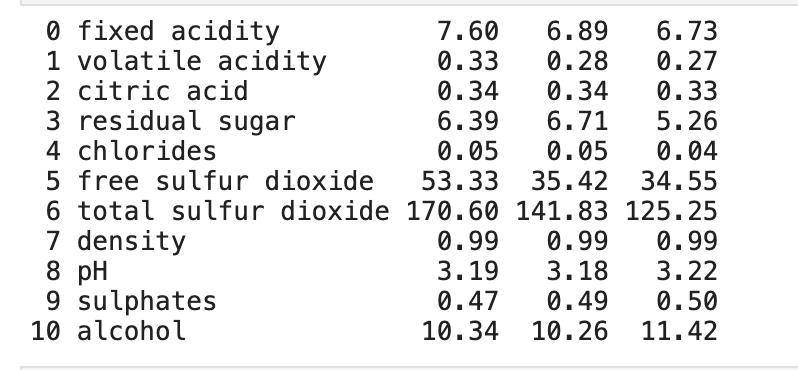

In [10]:
import torch 
import h5py
import numpy as np
import csv

### 加载数据, 创建tensor

In [81]:
wine_path = "./data/chapter3/winequality-white.csv"
wine_data = np.loadtxt(fname=wine_path,delimiter=';',skiprows=1) # 第一行是标签
wine_data.shape

(4898, 12)

In [82]:
wine_label = next(csv.reader(open(wine_path),delimiter=';'))
wine_label = np.array(wine_label)
wine_label.shape

(12,)

In [83]:
# ndarray转为tensor
wine_data = torch.from_numpy(wine_data)

### 预处理张量


In [84]:
# 划分出评分做为ground_truth
wine_content = wine_data[:,:-1]
wine_score = wine_data[:,-1]

wine_content.shape,wine_score.shape

(torch.Size([4898, 11]), torch.Size([4898]))

In [88]:
wine_score

tensor([6., 6., 6.,  ..., 6., 7., 6.], dtype=torch.float64)

### 特征缩放

In [144]:
# 标准化
content_mean = wine_content.mean(dim=0)
content_var = wine_content.var(dim=0)
content_normalized = (wine_content - content_mean)/torch.sqrt(content_var)

### 数据审查

In [145]:
# 酒分3个等级
content_bad = wine_content[torch.lt(wine_score,6)]
content_mid = wine_content[torch.ge(wine_score,6) & torch.lt(wine_score,8)]
content_good = wine_content[torch.gt(wine_score,8)]

content_bad.shape

torch.Size([1640, 11])

In [146]:
# 对酒中的化学含量做平均值
content_bad = content_bad.mean(dim=0)
content_mid = content_mid.mean(dim=0)
content_good = content_good.mean(dim=0)

content_bad.shape

torch.Size([11])

In [147]:
for i,args in enumerate(zip(wine_label,content_bad,content_mid,content_good)):
    print('{:2} {:20} {:6.2f} {:6.2f} {:6.2f}'.format(i,*args))

 0 fixed acidity          6.96   6.81   7.42
 1 volatile acidity       0.31   0.26   0.30
 2 citric acid            0.33   0.33   0.39
 3 residual sugar         7.05   6.08   4.12
 4 chlorides              0.05   0.04   0.03
 5 free sulfur dioxide   35.34  35.21  33.40
 6 total sulfur dioxide 148.60 133.64 116.00
 7 density                1.00   0.99   0.99
 8 pH                     3.17   3.20   3.31
 9 sulphates              0.48   0.49   0.47
10 alcohol                9.85  10.80  12.18
